In [27]:
# Grafo

from network.graphAlgorithm import barabasiAlbert
from nodes.pushsum import PushSumNode, MessageType, GossipType

FANOUT = 3
NONEWS = 10

graph = barabasiAlbert(32)
nodes = {}
distances = {}

for (src, dst) in graph.edges:
    distances[(src, dst)] = 10

for i in graph.nodes:
    nodes[i] = (PushSumNode(i, distances, 1000, FANOUT, NONEWS))
    
print("Nodes: " + str(list(nodes.keys())))
print("Distances: " + str(distances))

Nodes: ['(0)', '(1)', '(2)', '(3)', '(4)', '(5)', '(6)', '(7)', '(8)', '(9)', '(10)', '(11)', '(12)', '(13)', '(14)', '(15)', '(16)', '(17)', '(18)', '(19)', '(20)', '(21)', '(22)', '(23)', '(24)', '(25)', '(26)', '(27)', '(28)', '(29)', '(30)', '(31)']
Distances: {('(0)', '(30)'): 10, ('(0)', '(7)'): 10, ('(0)', '(2)'): 10, ('(0)', '(24)'): 10, ('(0)', '(4)'): 10, ('(0)', '(14)'): 10, ('(1)', '(9)'): 10, ('(1)', '(19)'): 10, ('(1)', '(4)'): 10, ('(1)', '(24)'): 10, ('(1)', '(28)'): 10, ('(1)', '(6)'): 10, ('(1)', '(8)'): 10, ('(1)', '(23)'): 10, ('(2)', '(31)'): 10, ('(2)', '(28)'): 10, ('(3)', '(6)'): 10, ('(4)', '(24)'): 10, ('(4)', '(21)'): 10, ('(4)', '(12)'): 10, ('(4)', '(13)'): 10, ('(4)', '(26)'): 10, ('(4)', '(22)'): 10, ('(4)', '(16)'): 10, ('(5)', '(30)'): 10, ('(5)', '(22)'): 10, ('(6)', '(19)'): 10, ('(6)', '(21)'): 10, ('(7)', '(22)'): 10, ('(8)', '(20)'): 10, ('(9)', '(15)'): 10, ('(9)', '(17)'): 10, ('(9)', '(10)'): 10, ('(11)', '(24)'): 10, ('(13)', '(19)'): 10, ('(14

In [28]:
# Simulador

from sim.faulty import FaultySimulator

faulty_sim = FaultySimulator(nodes, distances, 0.2, 100000)
events = faulty_sim.start((MessageType.GOSSIP, -1, (GossipType.REQUEST,0,0,0)), "(0)")

print("\nLenght of events: {}".format(len(events)))
print("")
for node in nodes.values():
    print(str(node.id) + ': \tsum: ' + "{:.5f}".format(node.sum) + ' \tweight: ' + "{:.5f}".format(node.weight) + ' \taggregate: ' + "{:.5f}".format(node.aggregate))


Lenght of events: 66452

(0): 	sum: 1817.02876 	weight: 0.05678 	aggregate: 32000.00000
(1): 	sum: 1317.34654 	weight: 0.04117 	aggregate: 32000.00000
(2): 	sum: 780.35212 	weight: 0.02439 	aggregate: 32000.00000
(3): 	sum: 1007.01065 	weight: 0.03147 	aggregate: 32000.00000
(4): 	sum: 692.23563 	weight: 0.02163 	aggregate: 32000.00000
(5): 	sum: 1030.89131 	weight: 0.03222 	aggregate: 32000.00000
(6): 	sum: 792.61598 	weight: 0.02477 	aggregate: 32000.00000
(7): 	sum: 1121.21797 	weight: 0.03504 	aggregate: 32000.00000
(8): 	sum: 935.51136 	weight: 0.02923 	aggregate: 32000.00000
(9): 	sum: 1709.01946 	weight: 0.05341 	aggregate: 32000.00000
(10): 	sum: 1282.23384 	weight: 0.04007 	aggregate: 32000.00000
(11): 	sum: 704.84923 	weight: 0.02203 	aggregate: 32000.00000
(12): 	sum: 507.24879 	weight: 0.01585 	aggregate: 31999.99900
(13): 	sum: 1015.66780 	weight: 0.03174 	aggregate: 32000.00000
(14): 	sum: 1014.50878 	weight: 0.03170 	aggregate: 32000.00000
(15): 	sum: 810.01223 	weight:

In [25]:
events += faulty_sim.proceed(100000)

print("\nLenght of events: {}".format(len(events)))

for node in nodes.values():
    print(str(node.id) + ': \tsum: ' + "{:.5f}".format(node.sum) + ' \tweight: ' + "{:.5f}".format(node.weight) + ' \taggregate: ' + "{:.5f}".format(node.aggregate))


Lenght of events: 620600
(0): 	sum: 522.13831 	weight: 0.01632 	aggregate: 32000.01900
(1): 	sum: 1044.22862 	weight: 0.03263 	aggregate: 31999.99500
(2): 	sum: 374.39972 	weight: 0.01170 	aggregate: 31999.98200
(3): 	sum: 529.78960 	weight: 0.01656 	aggregate: 32000.00200
(4): 	sum: 302.77366 	weight: 0.00946 	aggregate: 32000.00200
(5): 	sum: 256.24237 	weight: 0.00801 	aggregate: 31999.99000
(6): 	sum: 394.87998 	weight: 0.01234 	aggregate: 31999.98300
(7): 	sum: 576.70033 	weight: 0.01802 	aggregate: 31999.98600
(8): 	sum: 681.65285 	weight: 0.02130 	aggregate: 31999.98800
(9): 	sum: 569.78055 	weight: 0.01781 	aggregate: 31999.99400
(10): 	sum: 667.03999 	weight: 0.02085 	aggregate: 31999.99300
(11): 	sum: 949.36516 	weight: 0.02967 	aggregate: 31999.99100
(12): 	sum: 374.39972 	weight: 0.01170 	aggregate: 31999.98200
(13): 	sum: 764.27883 	weight: 0.02388 	aggregate: 31999.98500
(14): 	sum: 428.56339 	weight: 0.01339 	aggregate: 31999.98600
(15): 	sum: 681.65285 	weight: 0.02130

In [29]:
# stats
message_count = 0

for event in events:
    if event[1][2][0] is MessageType.GOSSIP or event[1][2][0] is MessageType.RETRANSMISSION or event[1][2][0] is MessageType.ACK:
        message_count += 1

print("time: " + str(faulty_sim.current_instant) + " ms")
print("messages: " + str(message_count))

time: 13640.0 ms
messages: 66452


In [2]:
# Constants
from benchmark.statisticsproducer import draw_plot
from benchmark.resultsproducer import produce_results
from network.graphtype import GraphType
from benchmark.statisticsproducer import calculate_points

INITIAL_VALUE = 10
FANOUT = 1
NO_NEWS = 5
ERROR_PERCENTAGE = 0
TRIES = 5

([2, 4, 8, 16, 32, 64, 128, 256], [130.0, 514.5, 1206.0, 4124.0, 4110.0, 3752.0, 2246.0, 3460.0], [2, 4, 8, 16, 32, 64, 128, 256], [37, 502.6, 2315.8, 15483.4, 30368.2, 52462.6, 63796.6, 169994.2])
([2, 4, 8, 16, 32, 64, 128, 256], [130.0, 414.0, 834.0, 1456.0, 1248.0, 1678.0, 1674.0, 1960.0], [2, 4, 8, 16, 32, 64, 128, 256], [37, 385, 1564.6, 5613.4, 9310.6, 25000.6, 51053.8, 119710.6])
([2, 4, 8, 16, 32, 64, 128, 256], [130.0, 380.0, 570.5, 712.5, 1642.0, 5694.0, 13378.0, 18094.0], [2, 4, 8, 16, 32, 64, 128, 256], [37, 338.2, 1078.6, 2703.4, 12435.4, 79117, 329158.6, 760221.4])


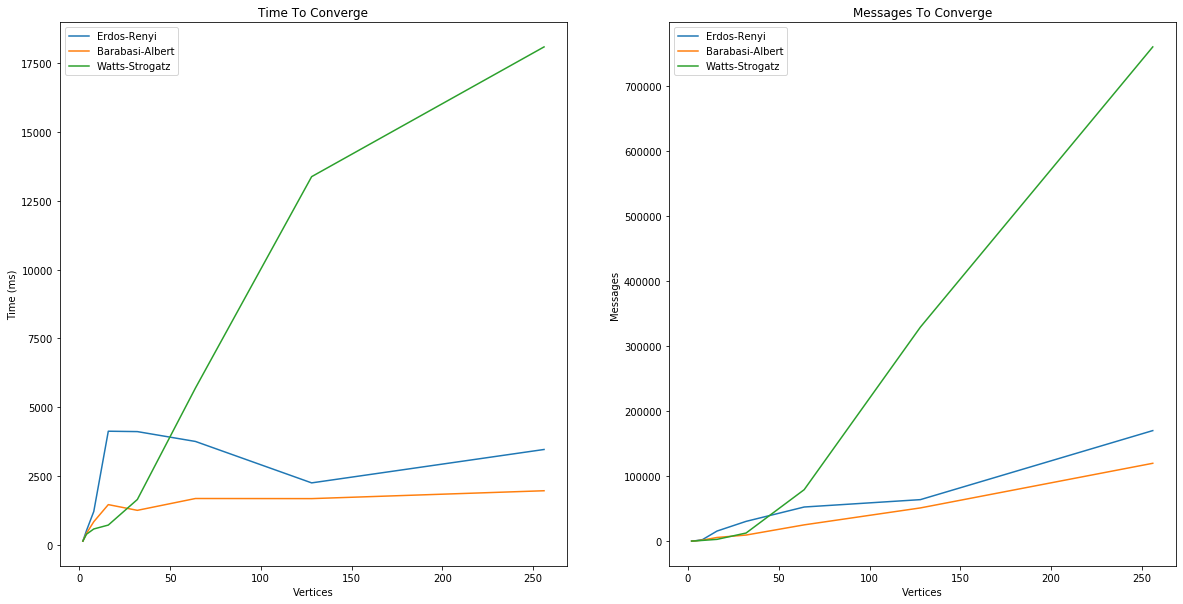

In [2]:
# Choose Topology

durations, messages = produce_results(GraphType.ERDOS_RENYI, INITIAL_VALUE, FANOUT, NO_NEWS, ERROR_PERCENTAGE, TRIES)
erdos = calculate_points(durations) + calculate_points(messages)
print(erdos)

durations, messages = produce_results(GraphType.BARABASI_ALBERT, INITIAL_VALUE, FANOUT, NO_NEWS, ERROR_PERCENTAGE, TRIES)
barabasi = calculate_points(durations) + calculate_points(messages)
print(barabasi)

durations, messages = produce_results(GraphType.WATTS_STROGATZ, INITIAL_VALUE, FANOUT, NO_NEWS, ERROR_PERCENTAGE, TRIES)
watts = calculate_points(durations) + calculate_points(messages)
print(watts)

draw_plot(("Erdos-Renyi", erdos), ("Barabasi-Albert", barabasi), ("Watts-Strogatz", watts))

([2, 4, 8, 16, 32, 64, 128, 256], [130.0, 306.0, 720.0, 1254.0, 1502.0, 1708.0, 1878.0, 2250.5], [2, 4, 8, 16, 32, 64, 128, 256], [37, 232.6, 1319.8, 4876.6, 11271.4, 25472.2, 57205, 143609.8])
([2, 4, 8, 16, 32, 64, 128, 256], [130.0, 428.0, 802.0, 860.0, 1154.0, 1000.0, 1076.0, 1120.0], [2, 4, 8, 16, 32, 64, 128, 256], [37, 598.6, 2637.4, 6093.4, 16123, 28281.4, 60268.6, 128049.4])
([2, 4, 8, 16, 32, 64, 128, 256], [130.0, 400.0, 886.0, 778.0, 726.0, 840.0, 976.0, 1008.0], [2, 4, 8, 16, 32, 64, 128, 256], [37, 593.8, 3529, 7090.6, 14047, 33119.8, 77714.2, 164073.4])
([2, 4, 8, 16, 32, 64, 128, 256], [130.0, 396.0, 762.0, 670.0, 738.0, 820.0, 694.0, 912.0], [2, 4, 8, 16, 32, 64, 128, 256], [37, 629.8, 3478.6, 7463.8, 16671.4, 40682.2, 72232.6, 186201.4])
([2, 4, 8, 16, 32, 64, 128, 256], [130.0, 420.0, 650.0, 644.0, 648.0, 782.0, 730.0, 854.0], [2, 4, 8, 16, 32, 64, 128, 256], [37, 610.6, 3171.4, 7353.4, 19165, 45619, 83884.6, 210374.2])


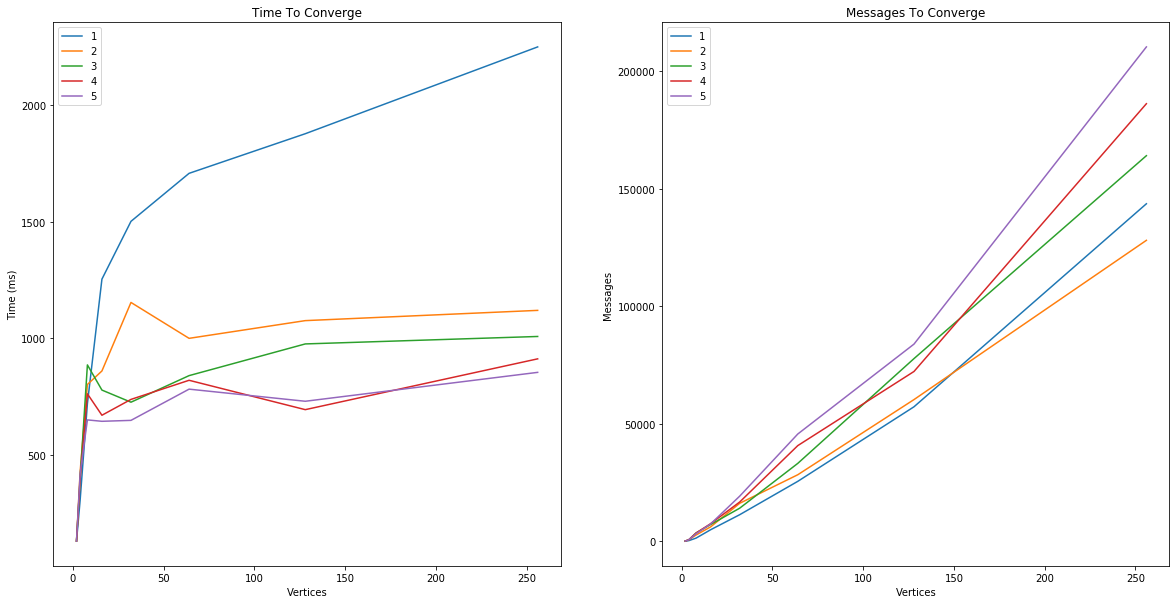

In [4]:
# Choose Fanout

TOPOLOGY = GraphType.BARABASI_ALBERT

durations, messages = produce_results(TOPOLOGY, INITIAL_VALUE, 1, NO_NEWS, ERROR_PERCENTAGE, TRIES)
one = calculate_points(durations) + calculate_points(messages)
print(one)

durations, messages = produce_results(TOPOLOGY, INITIAL_VALUE, 2, NO_NEWS, ERROR_PERCENTAGE, TRIES)
two = calculate_points(durations) + calculate_points(messages)
print(two)

durations, messages = produce_results(TOPOLOGY, INITIAL_VALUE, 3, NO_NEWS, ERROR_PERCENTAGE, TRIES)
three = calculate_points(durations) + calculate_points(messages)
print(three)

durations, messages = produce_results(TOPOLOGY, INITIAL_VALUE, 4, NO_NEWS, ERROR_PERCENTAGE, TRIES)
four = calculate_points(durations) + calculate_points(messages)
print(four)

durations, messages = produce_results(TOPOLOGY, INITIAL_VALUE, 5, NO_NEWS, ERROR_PERCENTAGE, TRIES)
five = calculate_points(durations) + calculate_points(messages)
print(five)

draw_plot(("1", one), ("2", two), ("3", three), ("4", four), ("5", five))

([2, 4, 8, 16, 32, 64, 128, 256], [130.0, 400.0, 982.0, 788.0, 856.0, 934.0, 916.0, 1020.0], [2, 4, 8, 16, 32, 64, 128, 256], [37, 525.4, 3343, 5278.6, 11998.6, 24956.2, 48527.8, 112617.4])
([2, 4, 8, 16, 32, 64, 128, 256], [168.5, 506.0, 1239.0, 1614.0, 1184.0, 1402.0, 1430.5, 1594.5], [2, 4, 8, 16, 32, 64, 128, 256], [37.8, 652.6, 3471.6, 9512.2, 13860.2, 31840, 65572.4, 147180.6])
([2, 4, 8, 16, 32, 64, 128, 256], [162.5, 574.5, 1228.0, 1010.5, 1547.5, 1864.5, 2095.0, 1778.5], [2, 4, 8, 16, 32, 64, 128, 256], [37.8, 593.8, 3414.6, 4856.4, 15778, 38828.8, 68729, 128268.6])
([2, 4, 8, 16, 32, 64, 128, 256], [240.0, 726.0, 1016.5, 1874.5, 2253.5, 2244.0, 2115.0, 2947.5], [2, 4, 8, 16, 32, 64, 128, 256], [39.8, 740.8, 2414.6, 8347.4, 20152.2, 38139.2, 59201.2, 173194.2])
([2, 4, 8, 16, 32, 64, 128, 256], [267.0, 918.0, 1478.5, 1718.0, 2350.0, 2446.0, 4153.5, 3961.5], [2, 4, 8, 16, 32, 64, 128, 256], [40.6, 682, 3229, 6786.6, 16253.2, 34624.2, 85077, 179329])
([2, 4, 8, 16, 32, 64, 128, 

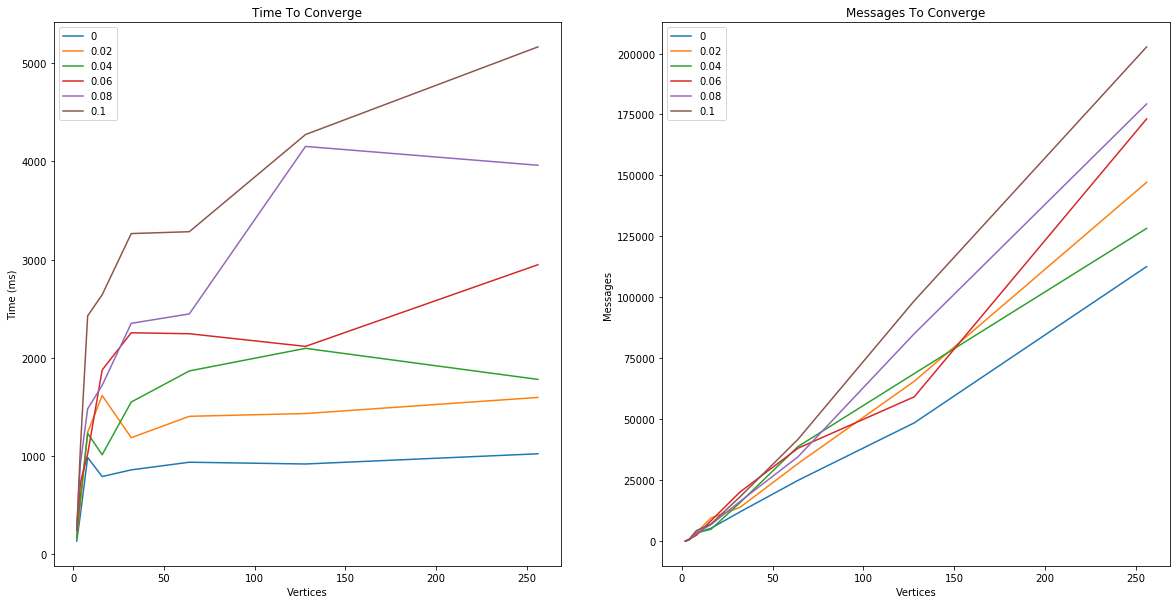

In [4]:
# Choose Error Percentage

TOPOLOGY = GraphType.BARABASI_ALBERT
FANOUT = 2

durations, messages = produce_results(TOPOLOGY, INITIAL_VALUE, FANOUT, NO_NEWS, 0, TRIES)
zero = calculate_points(durations) + calculate_points(messages)
print(zero)

durations, messages = produce_results(TOPOLOGY, INITIAL_VALUE, FANOUT, NO_NEWS, 0.02, TRIES)
point2 = calculate_points(durations) + calculate_points(messages)
print(point2)

durations, messages = produce_results(TOPOLOGY, INITIAL_VALUE, FANOUT, NO_NEWS, 0.04, TRIES)
point4 = calculate_points(durations) + calculate_points(messages)
print(point4)

durations, messages = produce_results(TOPOLOGY, INITIAL_VALUE, FANOUT, NO_NEWS, 0.06, TRIES)
point6 = calculate_points(durations) + calculate_points(messages)
print(point6)

durations, messages = produce_results(TOPOLOGY, INITIAL_VALUE, FANOUT, NO_NEWS, 0.08, TRIES)
point8 = calculate_points(durations) + calculate_points(messages)
print(point8)

durations, messages = produce_results(TOPOLOGY, INITIAL_VALUE, FANOUT, NO_NEWS, 0.1, TRIES)
ten = calculate_points(durations) + calculate_points(messages)
print(ten)

draw_plot(("0", zero), ("0.02", point2), ("0.04", point4), ("0.06", point6), ("0.08", point8), ("0.1", ten))

([2, 4, 8, 16, 32, 64, 128, 256], [142.0, 600.5, 1230.0, 1735.0, 1285.0, 1520.5, 1719.0, 2530.5], [2, 4, 8, 16, 32, 64, 128, 256], [38.2, 631.2, 3089, 8618, 12804.2, 28715.2, 66293.6, 172680.8])
([2, 4, 8, 16, 32, 64, 128, 256], [241.0, 638.0, 1266.5, 1890.0, 1618.5, 1441.0, 1711.5, 2287.5], [2, 4, 8, 16, 32, 64, 128, 256], [44.2, 637.2, 3033.4, 9474.2, 17459.4, 28922.2, 64557.8, 185357.4])
([2, 4, 8, 16, 32, 64, 128, 256], [236.5, 596.0, 1296.5, 1382.5, 1357.0, 1792.0, 1791.0, 2319.0], [2, 4, 8, 16, 32, 64, 128, 256], [51.8, 684.8, 3119.2, 7152.4, 13769.8, 36049, 65953.2, 162011.6])
([2, 4, 8, 16, 32, 64, 128, 256], [382.0, 726.5, 1404.5, 1636.0, 1448.0, 1522.0, 1849.0, 2495.5], [2, 4, 8, 16, 32, 64, 128, 256], [96.4, 788.8, 3511.4, 8351.2, 13374.6, 32026.8, 68144.8, 179329.2])
([2, 4, 8, 16, 32, 64, 128, 256], [324.5, 660.0, 1534.0, 1410.0, 1505.0, 1630.5, 2122.5, 2153.5], [2, 4, 8, 16, 32, 64, 128, 256], [65.8, 711.8, 3965.8, 7321.4, 15836, 32455.6, 81302.2, 149356.2])
([2, 4, 8, 16

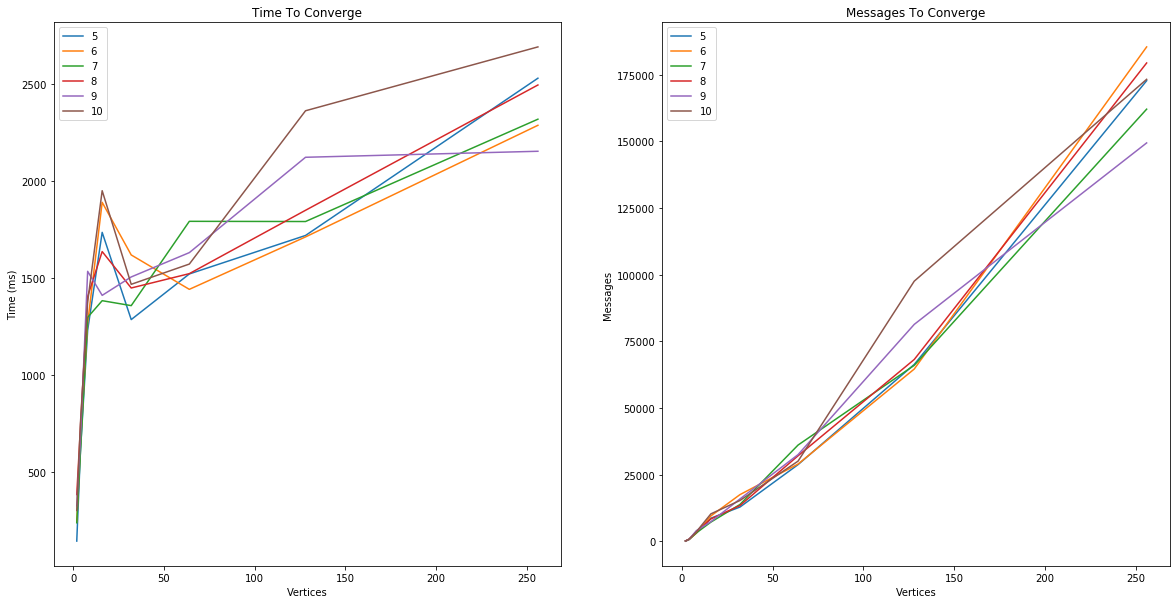

In [5]:
# Choose No News

TOPOLOGY = GraphType.BARABASI_ALBERT
FANOUT = 2
ERROR_PERCENTAGE = 0.04

durations, messages = produce_results(TOPOLOGY, INITIAL_VALUE, FANOUT, 5, ERROR_PERCENTAGE, TRIES)
five = calculate_points(durations) + calculate_points(messages)
print(five)

durations, messages = produce_results(TOPOLOGY, INITIAL_VALUE, FANOUT, 6, ERROR_PERCENTAGE, TRIES)
six = calculate_points(durations) + calculate_points(messages)
print(six)

durations, messages = produce_results(TOPOLOGY, INITIAL_VALUE, FANOUT, 7, ERROR_PERCENTAGE, TRIES)
seven = calculate_points(durations) + calculate_points(messages)
print(seven)

durations, messages = produce_results(TOPOLOGY, INITIAL_VALUE, FANOUT, 8, ERROR_PERCENTAGE, TRIES)
eight = calculate_points(durations) + calculate_points(messages)
print(eight)

durations, messages = produce_results(TOPOLOGY, INITIAL_VALUE, FANOUT, 9, ERROR_PERCENTAGE, TRIES)
nine = calculate_points(durations) + calculate_points(messages)
print(nine)

durations, messages = produce_results(TOPOLOGY, INITIAL_VALUE, FANOUT, 10, ERROR_PERCENTAGE, TRIES)
ten = calculate_points(durations) + calculate_points(messages)
print(ten)

draw_plot(("5", five), ("6", six), ("7", seven), ("8", eight), ("9", nine), ("10", ten))
